In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
num_feats = [feats for feats in df_train if df_train[feats].dtypes != 'O']
num_feats

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

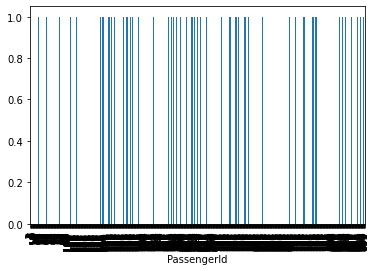

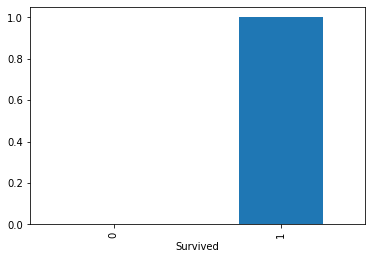

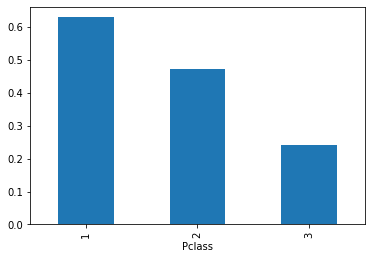

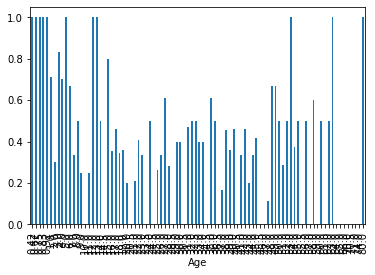

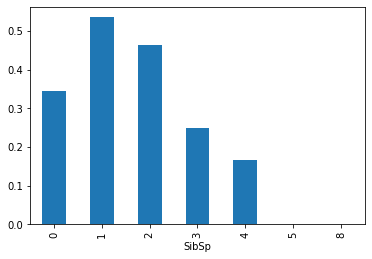

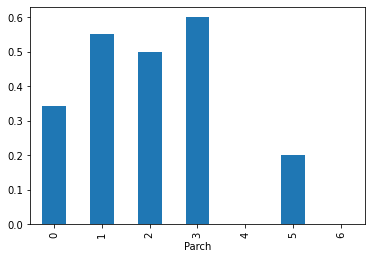

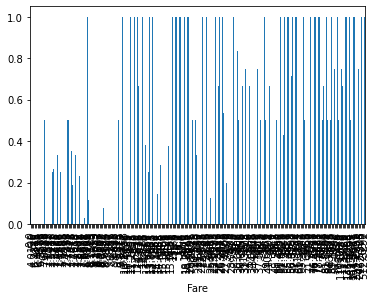

In [8]:
for feature in num_feats:
    df_train.groupby(feature)["Survived"].mean().plot.bar()
    plt.show()
    

In [9]:
cat_feats = [feat for feat in df_train if feat not in num_feats]
cat_feats

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

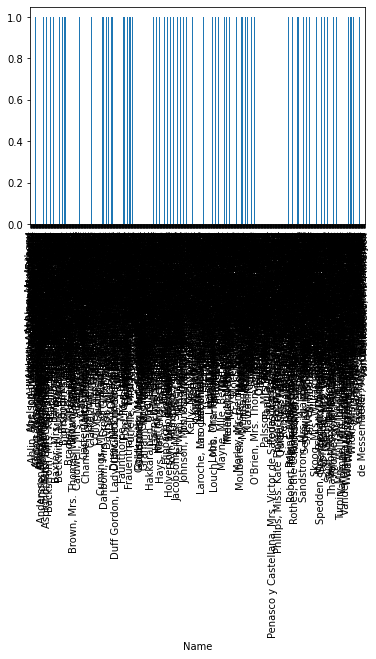

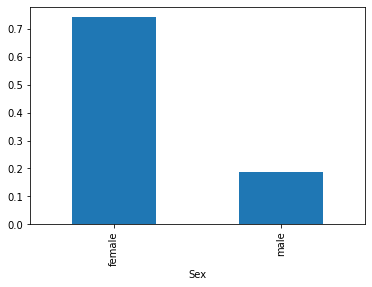

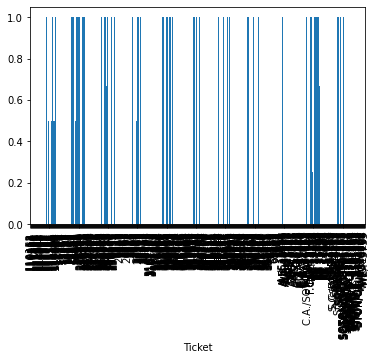

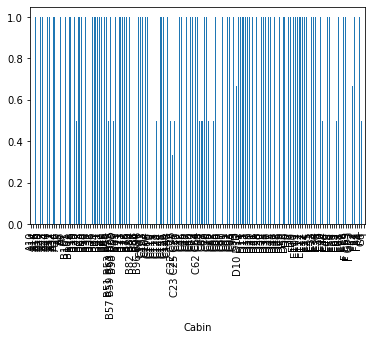

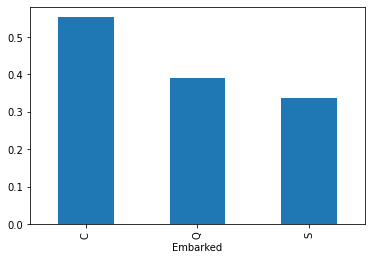

In [10]:
for feature in cat_feats:
    df_train.groupby(feature)["Survived"].mean().plot.bar()
    plt.show()

<AxesSubplot:>

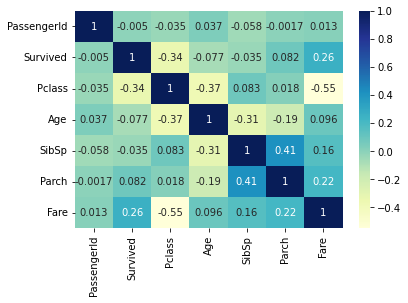

In [11]:
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True)

In [12]:
df_train["Cabin"].isnull().sum()

687

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [15]:
df_train.isnull().sum()
# Age has highest no. of missing values ,for now we'll fill NA with 500
# We will estimate the NA values only after calculating the MI scores
# NA values of 'Embarked' column can be filled it's median

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
df_train['Age'].fillna(500,inplace=True)

In [17]:
df_train.Age.isnull().sum()

0

In [18]:
new_cat_feats = [feat for feat in df_train if feat not in num_feats]
new_cat_feats

['Name', 'Sex', 'Ticket', 'Embarked']

In [19]:
X = df_train.copy()
X.drop(new_cat_feats,axis=1,inplace=True)
y = X.pop("Survived")

In [20]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [21]:
cols = X.columns
for col in cols:
    X[col] = X[col].astype(float)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [23]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Fare           0.163770
SibSp          0.037866
Parch          0.033039
Pclass         0.027747
PassengerId    0.024303
Age            0.008874
Name: MI Scores, dtype: float64

In [24]:
# First we focus on the features with top 3 scores, namely : 'Fare','Pclass','Age'
#   1.For age we'll first impute NA values from mean of age based on
#     its the column it is having maximum correlation with.
#   2.Convert age feature into discrete bands(0 - 10, 11 - 20 ,...71-80)
# We'll create a new feature from Parch and SibSp : Family_size
# Extract title from name feature

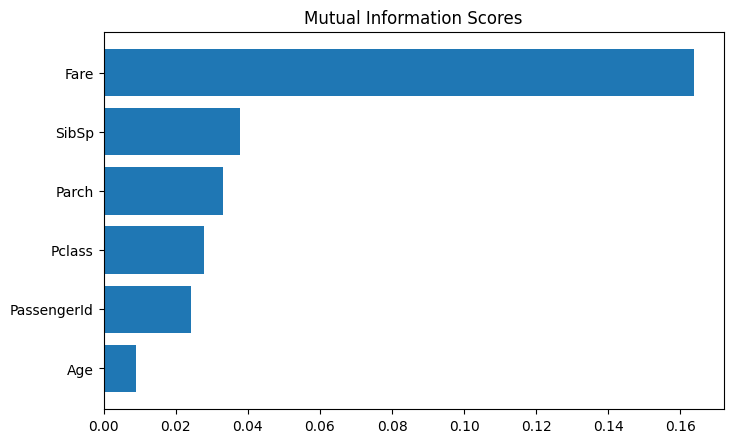

In [25]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

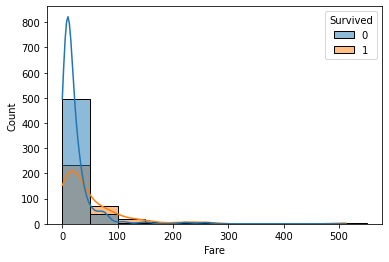

In [26]:
sns.histplot(data=df_train,x="Fare",hue="Survived",binwidth=50,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

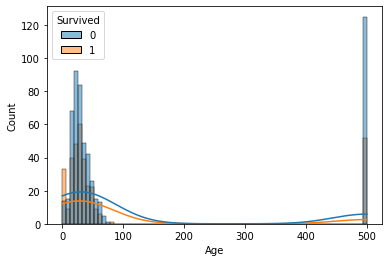

In [27]:
sns.histplot(data=df_train,x="Age",hue="Survived",kde=True)

In [28]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.017825,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.096799,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.149629,0.083081,0.018443,-0.549500
Age,-0.017825,-0.096799,0.149629,1.000000,0.002841,-0.136187,-0.094140
SibSp,-0.057527,-0.035322,0.083081,0.002841,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.136187,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.094140,0.159651,0.216225,1.000000


In [29]:
na_age = df_train['Age'] == 500
df_train.loc[na_age,'Age'] = 0

In [30]:
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    32.923241
2    28.091467
3    18.177026
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass'>

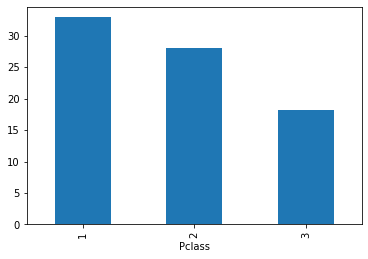

In [31]:
# Filling NA for 'Age' column:
df_train.groupby('Pclass')['Age'].mean().plot.bar()

In [32]:
# df_train.loc[(df_train['Age'].isna()) & (df_train['Pclass'] == 1),'Age'] = 33
# df_train.loc[(df_train['Age'].isna()) & (df_train['Pclass'] == 2),'Age'] = 28
# df_train.loc[(df_train['Age'].isna()) & (df_train['Pclass'] == 3),'Age'] = 18

In [33]:
df_train.loc[(df_train['Age'] == 0) & (df_train['Pclass'] == 1),'Age'] = 33
df_train.loc[(df_train['Age'] == 0) & (df_train['Pclass'] == 2),'Age'] = 28
df_train.loc[(df_train['Age'] == 0) & (df_train['Pclass'] == 3),'Age'] = 18

<AxesSubplot:xlabel='Age', ylabel='Count'>

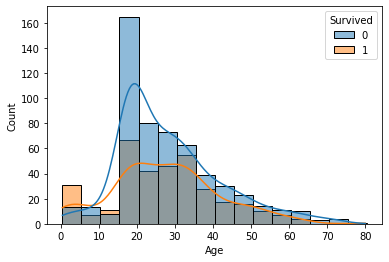

In [34]:
sns.histplot(data=df_train,x = "Age",hue = "Survived",kde=True,binwidth=5)

In [35]:
df_train["Age_bands"] = pd.cut(df_train["Age"],5)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bands
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(32.252, 48.168]"


In [36]:
df_train["Age_bands"].value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_bands, dtype: int64

In [37]:
df_train.loc[df_train["Age"] <= 16,'Age'] = 0
df_train.loc[(df_train["Age"] > 16) & (df_train["Age"] <= 32) ,'Age'] = 0
df_train.loc[(df_train["Age"] > 32) & (df_train["Age"] <= 48) ,'Age'] = 2
df_train.loc[(df_train["Age"] > 48) & (df_train["Age"] <= 64) ,'Age'] = 3
df_train.loc[(df_train["Age"] > 64) ,'Age'] = 4

In [38]:
# pd.set_option('display.max_rows', 500)
# pd.crosstab(df_train['Age'],df_train['Pclass'])

In [39]:
relations = ["SibSp","Parch"]
df_train["Family_size"] = df_train[relations].sum(axis=1)

In [40]:
df_train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bands,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,S,"(16.336, 32.252]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,"(32.252, 48.168]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,S,"(16.336, 32.252]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,S,"(32.252, 48.168]",1
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,S,"(32.252, 48.168]",0
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,Q,"(16.336, 32.252]",0
6,7,0,1,"McCarthy, Mr. Timothy J",male,3.0,0,0,17463,51.8625,S,"(48.168, 64.084]",0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,S,"(0.34, 16.336]",4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.0,0,2,347742,11.1333,S,"(16.336, 32.252]",2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,30.0708,C,"(0.34, 16.336]",1


In [41]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,0.020861,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.021027,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.456160,0.083081,0.018443,-0.549500,0.065997
Age,0.020861,0.021027,-0.456160,1.000000,-0.122752,-0.019903,0.185595,-0.093840
SibSp,-0.057527,-0.035322,0.083081,-0.122752,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.019903,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.185595,0.159651,0.216225,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,-0.093840,0.890712,0.783111,0.217138,1.000000


In [42]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Age_bands      category
Family_size       int64
dtype: object

In [43]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(df_train["Embarked"])  

In [44]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
embarked_col = df_train[["Embarked"]]
encoded_embarked = ord_encoder.fit_transform(embarked_col)
df_train["Embarked_num"] = encoded_embarked

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bands,Family_size,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,S,"(16.336, 32.252]",1,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,"(32.252, 48.168]",1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,S,"(16.336, 32.252]",0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,S,"(32.252, 48.168]",1,2.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,S,"(32.252, 48.168]",0,2.0


In [46]:
df_train["Embarked_num"].unique()
# 0 = C,1 = Q,S = 2 

array([ 2.,  0.,  1., nan])

In [47]:
embarked_mode = df_train["Embarked"].mode()
embarked_mode.astype(str)

0    S
dtype: object

In [48]:
df_train["Embarked_num"].fillna(df_train["Embarked_num"].median(),inplace=True)

In [49]:
df_train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
Age_bands       0
Family_size     0
Embarked_num    0
dtype: int64

In [50]:
df_train.drop(['Embarked'],axis=1,inplace=True)

In [51]:
new_cat_feats.remove("Embarked")

In [52]:
df_train["Title"] = df_train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Age_bands,Family_size,Embarked_num,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,"(16.336, 32.252]",1,2.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,"(32.252, 48.168]",1,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,"(16.336, 32.252]",0,2.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,"(32.252, 48.168]",1,2.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,"(32.252, 48.168]",0,2.0,Mr


In [53]:
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [54]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mnme', 'Miss')

<AxesSubplot:xlabel='Title'>

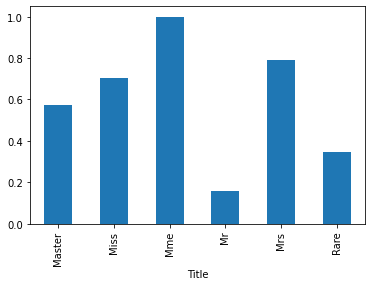

In [55]:
df_train.groupby('Title')["Survived"].mean().plot.bar()

In [56]:
df_train.drop("Age_bands",axis=1,inplace=True)

In [57]:
ord_encoder = OrdinalEncoder()
title_col = df_train[["Title"]]
encoded_title = ord_encoder.fit_transform(title_col)
df_train["Title_num"] = encoded_title

In [58]:
X = df_train.copy()
X.drop(new_cat_feats,axis=1,inplace=True)
X.drop("Title",axis=1,inplace=True)
y = X.pop("Survived")

In [59]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_size,Embarked_num,Title_num
0,1,3,0.0,1,0,7.2500,1,2.0,3.0
1,2,1,2.0,1,0,71.2833,1,0.0,4.0
2,3,3,0.0,0,0,7.9250,0,2.0,1.0
3,4,1,2.0,1,0,53.1000,1,2.0,4.0
4,5,3,2.0,0,0,8.0500,0,2.0,3.0


In [60]:
mi_scores2= mutual_info_regression(X, y)
mi_scores2 = pd.Series(mi_scores2, name="MI Scores", index=X.columns)
mi_scores2= mi_scores2.sort_values(ascending=False)
mi_scores2

Title_num       0.180164
Fare            0.114338
Parch           0.057533
Family_size     0.057061
Pclass          0.055787
Age             0.051673
PassengerId     0.014788
SibSp           0.010971
Embarked_num    0.000000
Name: MI Scores, dtype: float64

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_size,Embarked_num,Title,Title_num
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,1,2.0,Mr,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,1,0.0,Mrs,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,0,2.0,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,1,2.0,Mrs,4.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,0,2.0,Mr,3.0


In [62]:
X = df_train.copy()
y = X.pop("Survived")
x_feats = ["Title_num","Fare","Family_size","Pclass"]
X = df_train.loc[:,x_feats]


In [63]:
# K-Means
from sklearn.cluster import KMeans
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
kmeans = KMeans(n_clusters=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)

In [64]:
X.head()

,Title_num,Fare,Family_size,Pclass,Cluster
0,3.0,7.2500,1,3,0
1,4.0,71.2833,1,1,3
2,1.0,7.9250,0,3,4
3,4.0,53.1000,1,1,3
4,3.0,8.0500,0,3,0


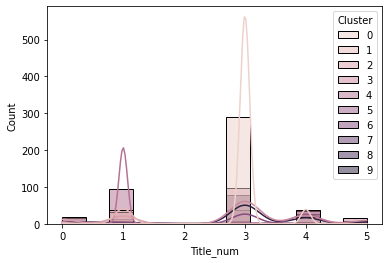

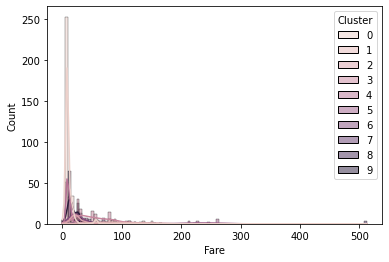

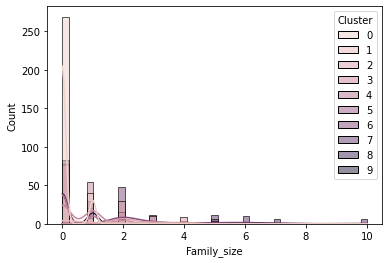

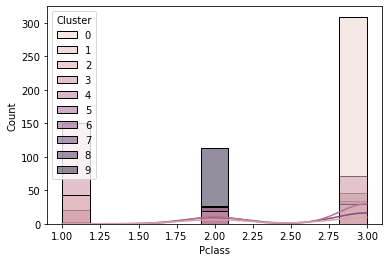

In [65]:
for col in x_feats:
    sns.histplot(data = X,x = col,hue = "Cluster",kde=True)
    plt.show()

In [66]:
df_train["Clust1"] = X["Cluster"]
# CHANGE : Use the K means distances as features instead of the clusters as features

In [67]:
# PCA
X = df_train.copy()
y = X.pop("Survived")
X= X.loc[:,x_feats]
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)

In [68]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [69]:
X_pca = pd.DataFrame(X_pca,columns=["PC1","PC2","PC3","PC4"])

In [70]:
X_pca.head()

,PC1,PC2,PC3,PC4
0,-0.900869,0.021176,0.421650,0.212293
1,1.627518,-1.130307,0.593661,-0.399489
2,-1.018047,0.774279,-1.240302,0.233069
3,1.365000,-1.162352,0.597479,-0.652339
4,-1.009491,-0.393403,0.012458,0.394729


<BarContainer object of 4 artists>

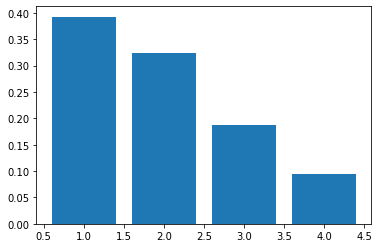

In [71]:
evr = pca.explained_variance_ratio_
plt.bar([1,2,3,4],evr)

In [72]:
mi_scores3= mutual_info_regression(X_pca, y)
mi_scores3 = pd.Series(mi_scores3, name="MI Scores", index=X.columns)
mi_scores3= mi_scores3.sort_values(ascending=False)
mi_scores3

Family_size    0.262448
Fare           0.209113
Title_num      0.154258
Pclass         0.122719
Name: MI Scores, dtype: float64